<a href="https://www.kaggle.com/code/giovanacoutinho/ss-violet-fmu?scriptVersionId=230870540" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
#Importando as bibliotecas
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar os dados
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [4]:
# Para evitar o FutureWarning
pd.set_option('future.no_silent_downcasting', True)

In [5]:
# Visualizar as primeiras linhas
print(train.head())
print(test.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
  

In [6]:
# Verificar informações sobre os dados
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Co

In [7]:
# Imputar ou remover valores ausentes
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['CryoSleep'] = train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])
train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])
train['VIP'] = train['VIP'].fillna(False)

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Cabin'] = test['Cabin'].fillna(test['Cabin'].mode()[0])
test['Destination'] = test['Destination'].fillna(test['Destination'].mode()[0])
test['VIP'] = test['VIP'].fillna(False)

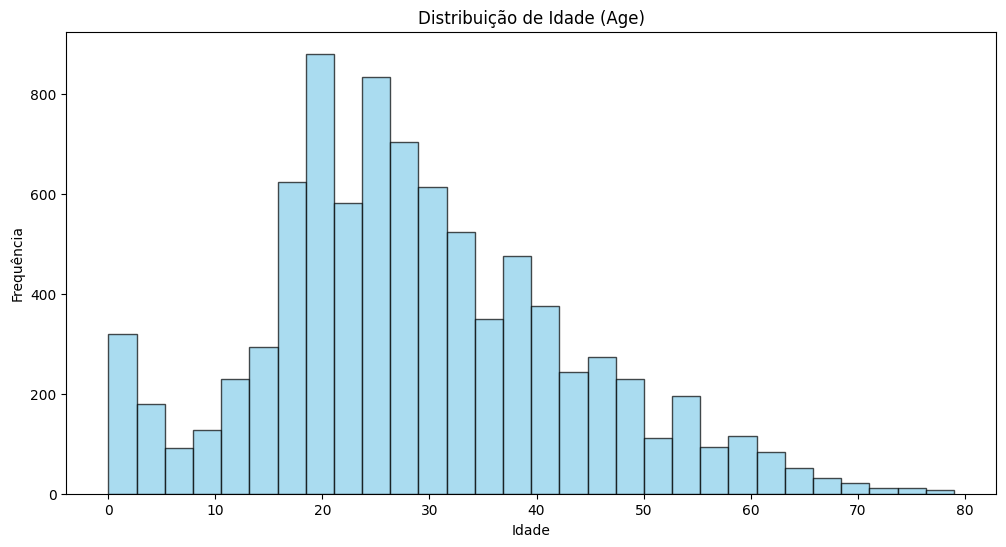

In [8]:
# Histograma para as variáveis numéricas
plt.figure(figsize=(12, 6))
train['Age'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição de Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

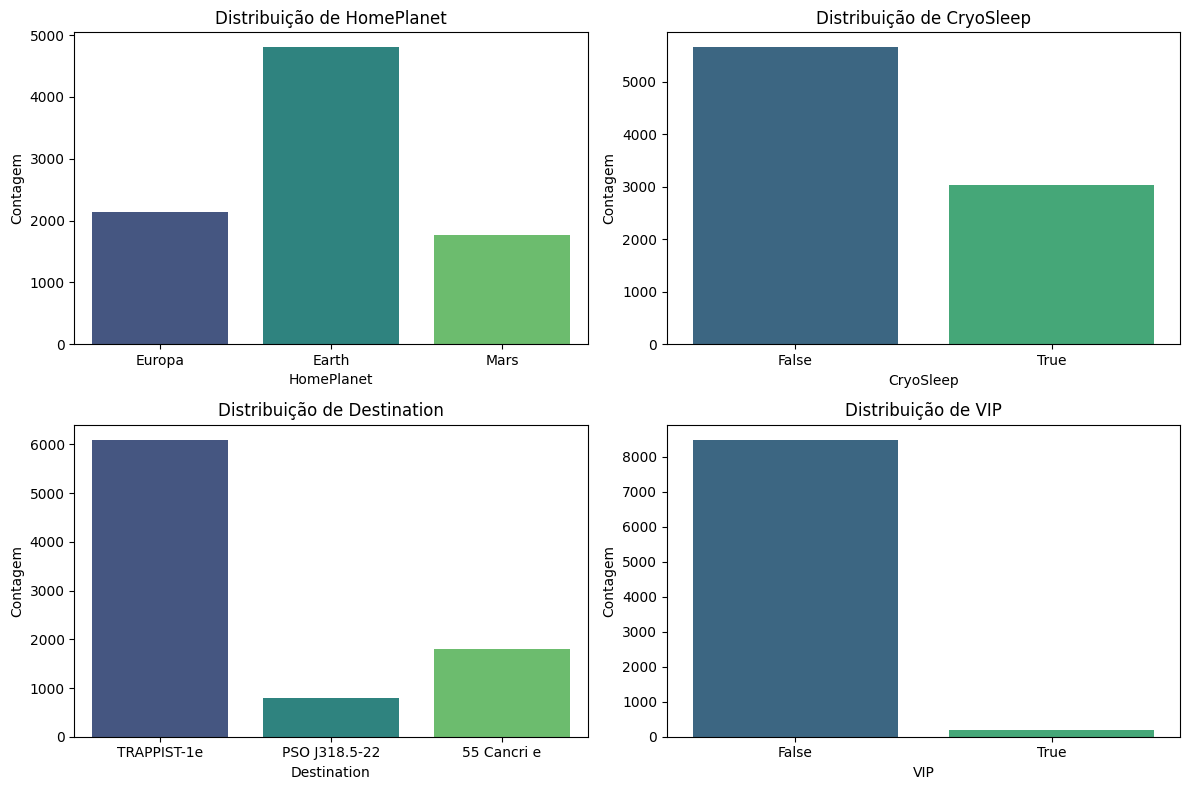

In [9]:
# Gráfico de barras para variáveis categóricas
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=train, x=col, palette='viridis')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [10]:
# Certificando de que 'Transported' tenha valores booleanos True ou False
train['Transported'] = train['Transported'].map({'True': True, 'False': False, True: True, False: False})
train['Transported'] = train['Transported'].fillna(False)

In [11]:
# Separar as variáveis independentes (X) e dependentes (y)
X = train.drop(columns=['Transported'])
y = train['Transported']

In [12]:
# Dividir o conjunto de treino em treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Verificar se há valores ausentes em X_train
print(X_train.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     126
FoodCourt       140
ShoppingMall    165
Spa             134
VRDeck          151
Name            159
dtype: int64


In [14]:
# Preencher valores ausentes para variáveis numéricas com a média
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])  # Seleciona apenas colunas numéricas
X_train[X_train_numeric.columns] = X_train_numeric.fillna(X_train_numeric.mean()) 

# Preencher valores ausentes para variáveis categóricas com o modo (valor mais frequente)
X_train_categorical = X_train.select_dtypes(include=['object'])  # Seleciona apenas colunas categóricas
X_train[X_train_categorical.columns] = X_train_categorical.apply(lambda x: x.fillna(x.mode()[0]))

In [15]:
# Realiza a codificação one-hot nas duas bases (treino e validação) de forma consistente
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)

# Garantir que X_valid tenha as mesmas colunas de X_train
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)

In [16]:
# Preencher valores ausentes em X_valid para variáveis numéricas
X_valid_numeric = X_valid.select_dtypes(include=['float64', 'int64'])
X_valid[X_valid_numeric.columns] = X_valid_numeric.fillna(X_valid_numeric.mean())

# Preencher valores ausentes em X_valid para variáveis categóricas
X_valid_categorical = X_valid.select_dtypes(include=['object'])
X_valid[X_valid_categorical.columns] = X_valid_categorical.apply(lambda x: x.fillna(x.mode()[0]))

# Garantir que X_valid tenha as mesmas colunas de X_train após one-hot encoding
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)

In [17]:
# Preparar X_test
X_test = test.drop(columns=['PassengerId'])

# Preencher valores ausentes
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])
X_test[X_test_numeric.columns] = X_test_numeric.fillna(X_test_numeric.mean())

X_test_categorical = X_test.select_dtypes(include=['object'])
X_test[X_test_categorical.columns] = X_test_categorical.apply(lambda x: x.fillna(x.mode()[0]))

# Realizar a codificação one-hot no conjunto de teste
X_test = pd.get_dummies(X_test)

# Garantir que X_test tenha as mesmas colunas de X_train após o one-hot encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [18]:
# Criar o modelo
model = RandomForestClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Fazer previsões no conjunto de validação
y_pred = model.predict(X_valid)

# Avaliar o modelo
accuracy = accuracy_score(y_valid, y_pred)
print(f'Acurácia: {accuracy:.4f}')

Acurácia: 0.7872


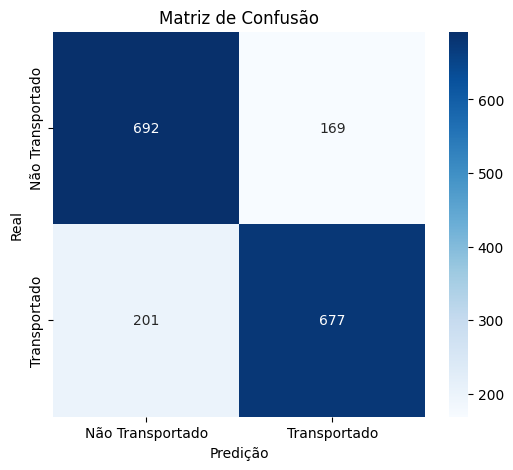

In [20]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_valid, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Transportado', 'Transportado'], yticklabels=['Não Transportado', 'Transportado'])
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

In [21]:
# Fazer previsões no conjunto de teste
test_predictions = model.predict(X_test)

# Criar o arquivo de submissão
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': test_predictions})

# Salvar o arquivo de submissão
submission.to_csv('submission.csv', index=False)
print(submission)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01        False
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]
